### Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

In [24]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Note : read_csv() can read from http, https, ftp and s3 (Amazon Simple Storage Service) and we don't need urllib.

In [25]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_type','car_name']
df = pd.read_csv(r"C:\Users\divyakamat\python_git_repositories\linear_regression\Milage Prediction\dataset\Car-mpg- Dataset.csv",names=columns,skiprows=1)

In [26]:
def intial_analysis(dataframe):
    
    # Enclosing the string within '\033[1m' and '\033[0m', displays the text in bold
    print ('\033[1m' + "Display first few rows of the data frame:"+'\033[0m')
    print(dataframe.head(3))
    
    print('\033[1m' + "\nDisplay the shape (columns and rows) of the dataset:" +'\033[0m' )
    print("\tcolumns : {}\n\trows : {}".format(dataframe.shape[0],dataframe.shape[1]))
    
    print('\033[1m' + "\nInformation about the dataset:" +'\033[0m')
    dataframe.info()
    
    print('\033[1m' + "\nDetails on Numerical and Categorical features within dataset:\n" + '\033[0m')
    #list the number of Numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    print("Numeric Columns:",numerical_feature_columns)
    
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    print("Categorical Columns:",categorical_feature_columns)
    
    print('\033[1m' + "\nPrint any null values within dataset:\n" + '\033[0m')
    labels = []
    values = []
    for col in dataframe.columns:
        labels.append(col)
        values.append(dataframe[col].isnull().sum())
        if values[-1]!=0:
            print(col, values[-1])

intial_analysis(df)  

Display first few rows of the data frame:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   

   origin  car_type                   car_name  
0       1         0  chevrolet chevelle malibu  
1       1         0          buick skylark 320  
2       1         0         plymouth satellite  

Display the shape (columns and rows) of the dataset:
	columns : 398
	rows : 10

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
mod

In [27]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [28]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [29]:
df['cylinders'] = pd.Categorical(df.cylinders)
df['origin'] = pd.Categorical(df.origin)
df['model_year'] = pd.Categorical(df.model_year)

In [30]:
df_train = df[:]

In [31]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column
temp = pd.DataFrame(df_train.horsepower.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['horsepower'] == False]   # from temp take only those rows where hp has false

# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
df_train = df_train.replace('?', np.nan)

df_train["horsepower"].fillna(df_train["horsepower"].median(), inplace=True)

df_train['horsepower'] = df_train['horsepower'].astype('float64')  # converting the hp column from object / string type to float


## EDA (Exploratory Data Analysis)
EDA falls into four main areas:
    
    - Univariate non-graphical — looking at one variable of interest, like age, height, income level etc.
    - Univariate graphical.
    - Multivariate non-graphical — analysis of multiple variables at the same time.
    - Multivariate graphical.


### Univariate non-graphical Analysis

#### Summary Statistics

In [32]:
df_train.describe()

,mpg,displacement,horsepower,weight,acceleration,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.304020,2970.424623,15.568090,0.530151
std,7.815984,104.269838,38.222625,846.841774,2.757689,0.499718
min,9.000000,68.000000,46.000000,1613.000000,8.000000,0.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000,0.000000
50%,23.000000,148.500000,93.500000,2803.500000,15.500000,1.000000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000,1.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,1.000000


- dispersion of data as indicated by the standard deviation
- tail on the right is indicated by Q3 - max
- tail on left is indicted by Q1 - min

#### Check Sample Variance

In [33]:
df_train.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1460.969052
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
car_type             0.249718
dtype: float64

#### Coefficient of variation (CV) 
Another measures of variability (relative variability) is the coefficient of variation (CV), which is defined as variation function in the scipy.stats module. The CV is unit-less when it comes to comparisons between the dispersions of two distributions of different units of measurement.

Estimate your coefficient of variation (CV=standard deviation / mean).As a rule of thumb, a CV >= 1 indicates a relatively high variation, while a CV < 1 can be considered low. This means that distributions with a coefficient of variation higher than 1 are considered to be high variance whereas those with a CV lower than 1 are considered to be low-variance. 
Remember,  standard deviations aren't "good" or "bad". They are indicators of how spread out your data is. A "good" SD depends if you expect your distribution to be centered or spread out around the mean. This really depends on your data.

In [34]:
#Command to find variation for a single column
stats.variation(df_train["horsepower"].values, axis=0)

0.36599333619288144

In [35]:
numerical_feature_columns = list(df._get_numeric_data().columns)
print(numerical_feature_columns) # Excludes last columns from selection
stats.variation(df_train[numerical_feature_columns])

['mpg', 'displacement', 'weight', 'acceleration', 'car_type']


array([0.33197112, 0.53839106, 0.28473277, 0.17691459, 0.94141167])

displacement is more variable than any other columns

#### Skew and Kurtosis
Skewness is a measure of a distribution’s asymmetry. Kurtosis is a summary statistic communicating information about the tails (the smallest and largest values) of the distribution. 
Utilize the skew() and kurt() methods for computing the unbiased skewness and kurtosis, respectively,

In [36]:
df_train._get_numeric_data().skew()

mpg             0.457066
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
car_type       -0.121280
dtype: float64

As the skewness is positive, the data is positively (right) skewed  - i.e right tail of the distribution is longer than the left.


In [37]:
df_train._get_numeric_data().kurt()

mpg            -0.510781
displacement   -0.746597
horsepower      0.763583
weight         -0.785529
acceleration    0.419497
car_type       -1.995343
dtype: float64

Kurtosis - Number greater than +1 indicates, the distribution is too peaked and -1 indicates a distribution is too flat

### Univariate graphical.

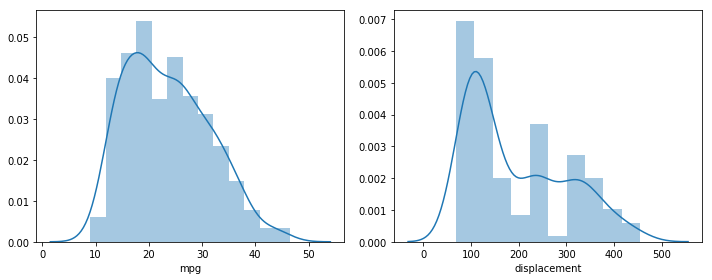

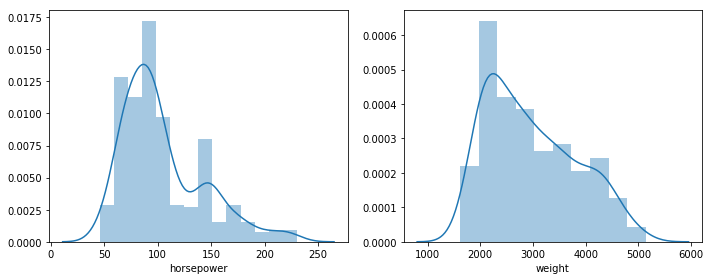

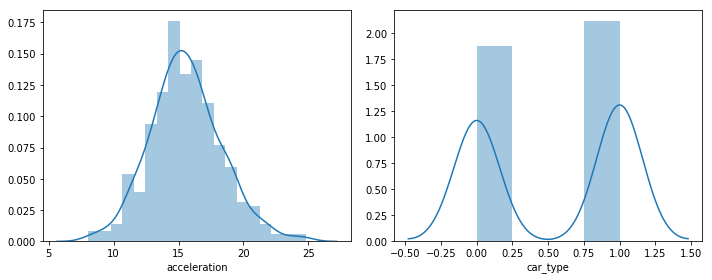

In [38]:
num_cols = list(df_train._get_numeric_data().columns)
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df_train[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(df_train[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df_train[num_cols[i]], hist=True, kde=True)

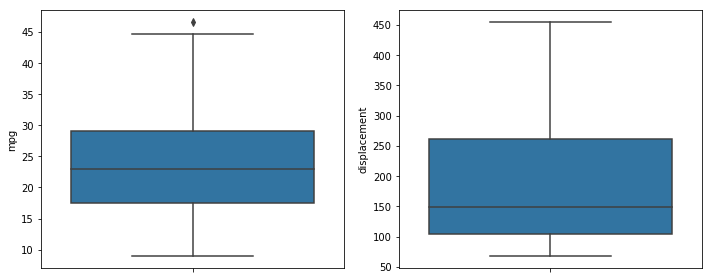

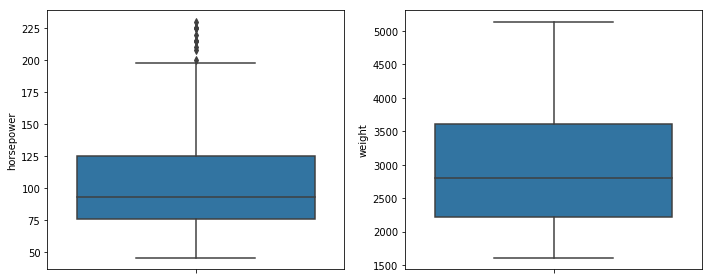

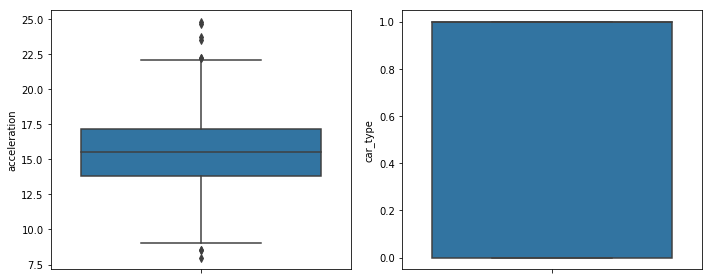

In [39]:
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(x=df_train[num_cols[i]],orient='v')
        plt.subplot(122)            
        sns.boxplot(x=df_train[num_cols[i+1]],orient='v')
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(x=df_train[num_cols[i]],orient='v')

#### Interpreting Box Plot
- If the median is not in the middle of the box the distribution is skewed. 
- If the median is closer to the bottom, the distribution is positively skewed. 
- If the median is closer to the top, the distribution is negatively skewed. 
- Extreme values and outliers are often represented with asterisks and circles 

#### Hinges
- The top and bottom edges of the box plot (the 3rd and 1st quartiles) are referred to as Tukey's hinges or just hinges
- 50% percentage of the data lies between the top and bottom edges of a box plot

### QQ plot

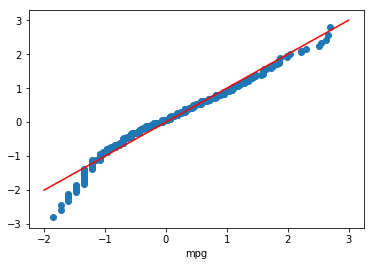

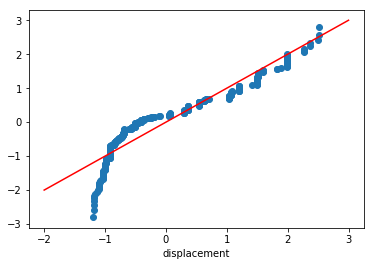

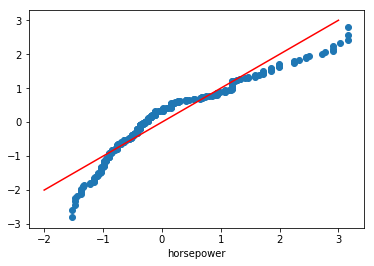

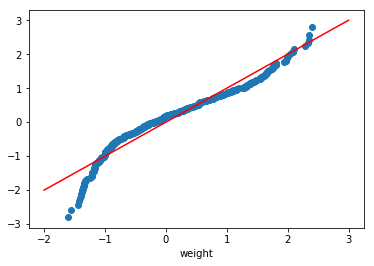

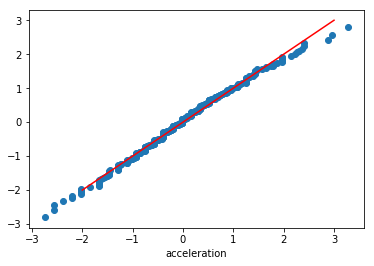

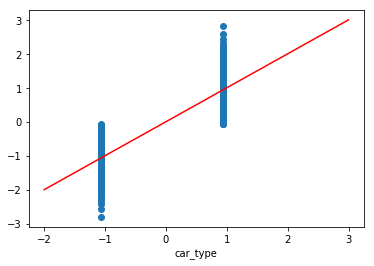

In [40]:
from scipy.special import ndtri

x = [-2,-1,0,1,2,3]
y = [-2,-1,0,1,2,3]

for i in list(df_train._get_numeric_data().columns):
    df_train_qq = df_train[[i]]
    df_train_qq = df_train_qq.sort_values(by=[i],ascending=True).reset_index()
    df_train_qq["count"] = df_train_qq.index + 1
    n_rows = df_train_qq.shape[0]
    df_train_qq['percentile_area'] = (df_train_qq['count'])/n_rows

    df_train_qq['z_theoritical'] = ndtri(df_train_qq['percentile_area'])
    df_train_qq['z_actual'] = (df_train_qq[i] - df_train_qq[i].mean())/df_train_qq[i].std(ddof=0)
    df_train_qq.head()

    plt.figure()
    plt.scatter(df_train_qq.z_actual,df_train_qq.z_theoritical)
    plt.xlabel(i)
    plt.plot(x,y,color='red')

### Probability Plot

Help us interpret if the points fall randomly around the line (data set normally distributed) or they follow a curved pattern instead of following the line (non-normality). 

slope, intercept, r: 7.7349470383233125 23.514572864321607 0.984742526005755
r is the square root of the coefficient of determination
slope, intercept, r: 98.47942288974457 193.42587939698493 0.9398008279412832
r is the square root of the coefficient of determination


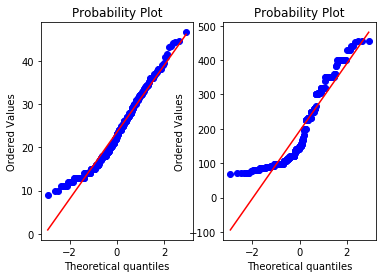

In [41]:
plt.subplot(121)
res = stats.probplot(df_train["mpg"], dist=stats.norm,plot=plt)
(osm, osr) = res[0]
(slope, intercept, r) = res[1]

# For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
print("slope, intercept, r:", slope, intercept, r)
print("r is the square root of the coefficient of determination")

plt.subplot(122)
res = stats.probplot(df_train["displacement"], dist=stats.norm,plot=plt)
(osm, osr) = res[0]
(slope, intercept, r) = res[1]
print("slope, intercept, r:", slope, intercept, r)
print("r is the square root of the coefficient of determination")



slope, intercept, r: 2.760555523777958 15.568090452261307 0.9960938043886872
r is the square root of the coefficient of determination


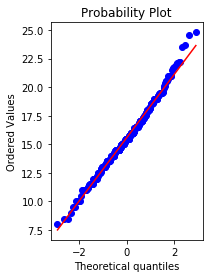

In [42]:
plt.subplot(121)
res = stats.probplot(df_train["acceleration"], dist=stats.norm,plot=plt)
(osm, osr) = res[0]
(slope, intercept, r) = res[1]

# For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
print("slope, intercept, r:", slope, intercept, r)
print("r is the square root of the coefficient of determination")

Deviation of the observed distribution from normal makes many powerful statistical tools useless. Note that some data sets can be transformed to a more normal distribution, in particular with log-transformation and square-root transformations. If a data set is severely skewed, another option is to discretize its values into a finite set.

### Bivariate Analysis

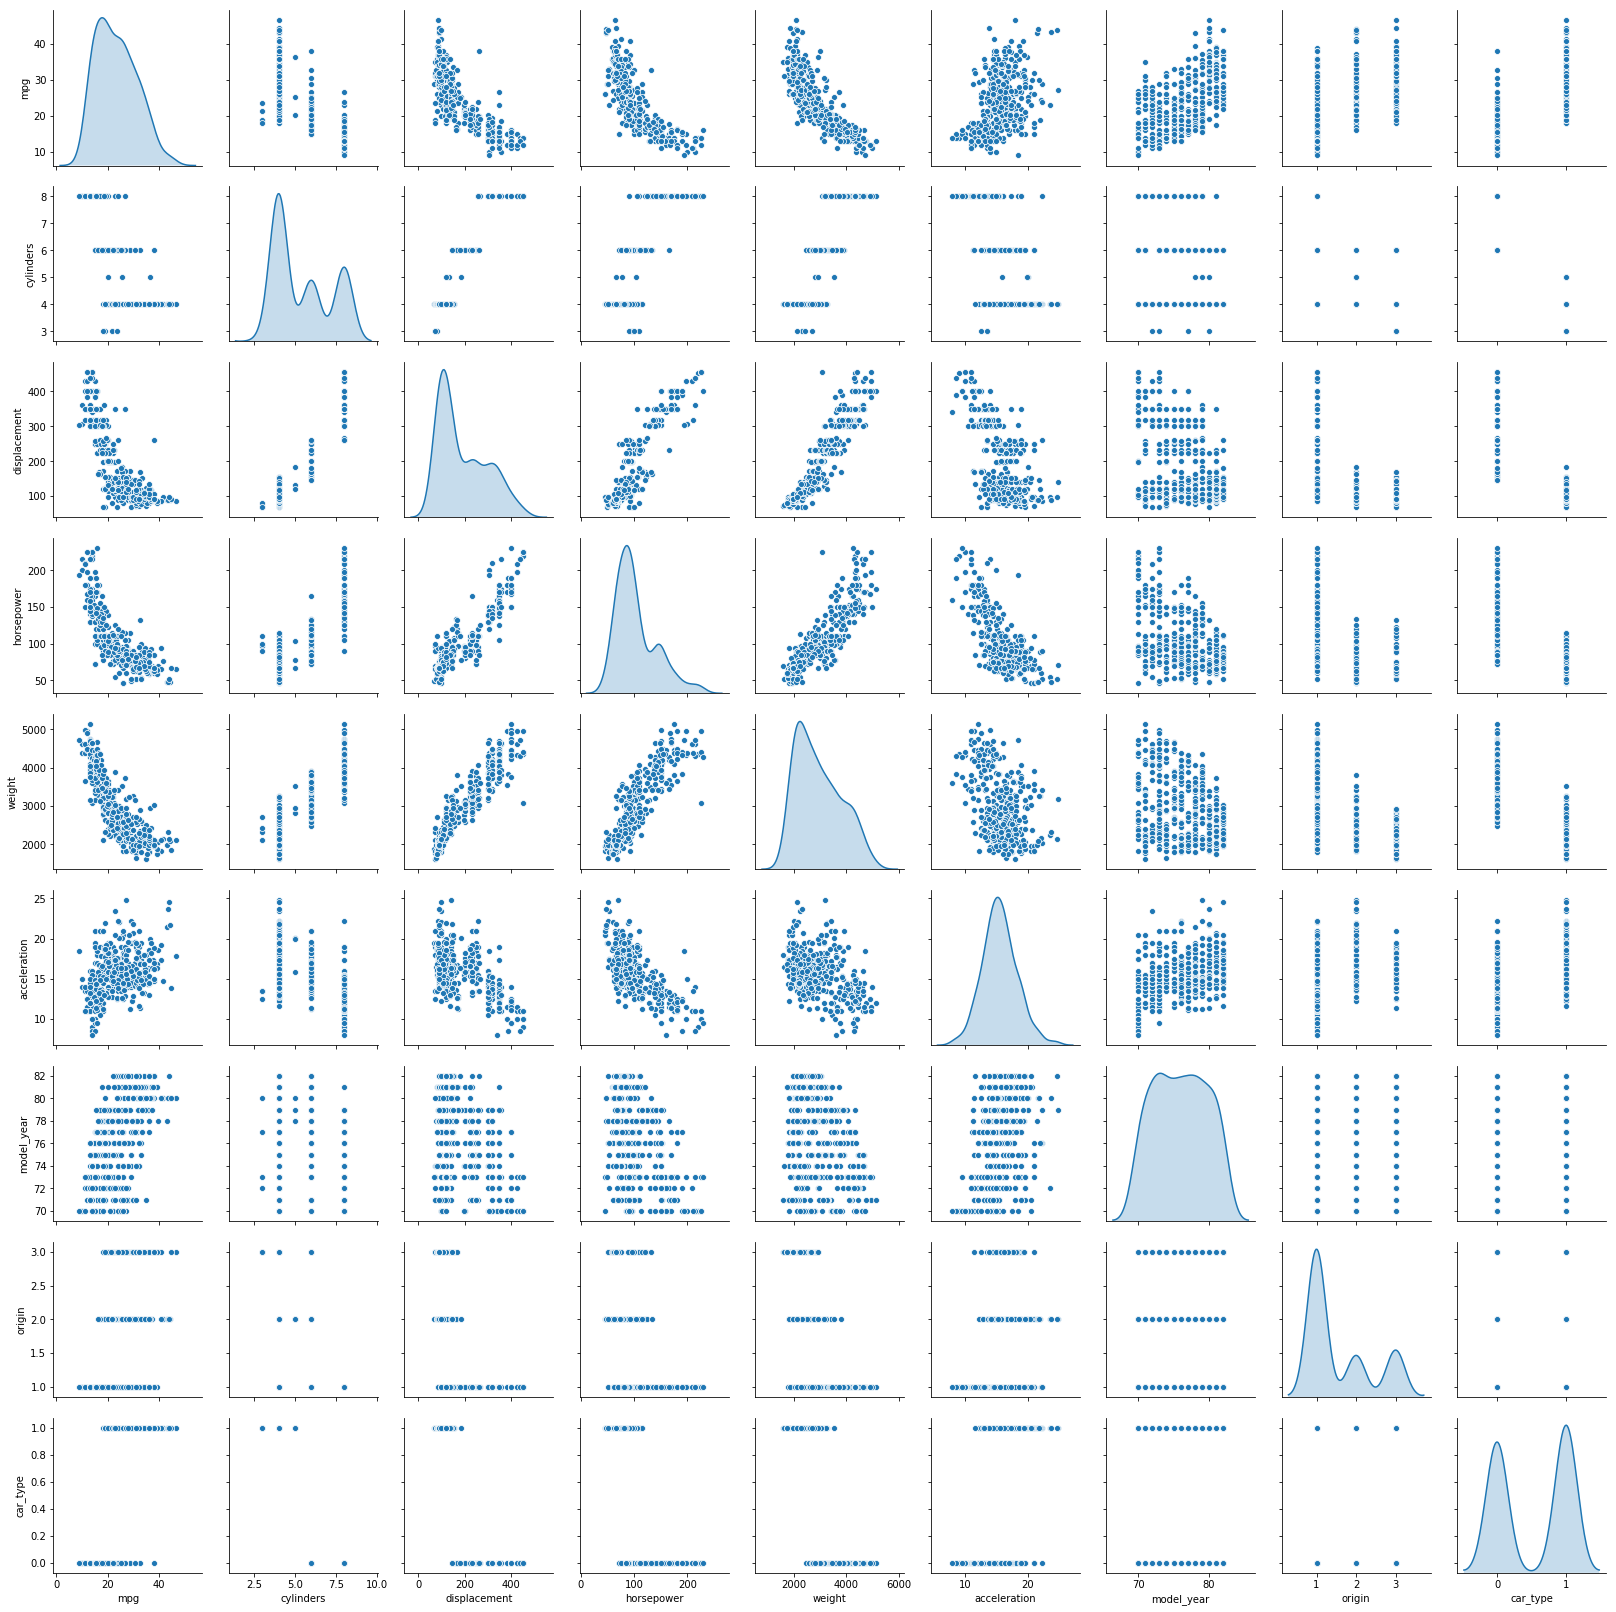

In [43]:
df_train_attr = df_train.iloc[:,0:10]
sns.pairplot(df_train_attr,diag_kind='kde')

If there is data with multiple peaks it indicates that probabily we have mixed up data from different segments. In such cases we need to take a call if building 1 model would make sense or should we have seperate models for every segment

### Data Preprocessing

In [44]:
#Replace the numbers in categorical variables with the actual country names
df_train['origin'] = df_train['origin'].replace({1: 'america',2:"europe",3:"asia"})

In [45]:
#One hot encoding for categorical variables
df_train = pd.get_dummies(df_train,columns=['origin'])

In [46]:
#Drop car names from the data frame
df_train.drop('car_name',axis = 1, inplace = True)

In [50]:
df_train.to_csv(r"C:\Users\divyakamat\python_git_repositories\linear_regression\Milage Prediction\dataset\Car-mpg-processed.csv",sep=",",index=False)